# Notebook 3.

This notebook will be concerned with EDA of our data.

Furthermore, this notebook will remove further duplicates that survived our first filtration technique in Notebook 2.

In [1]:
%run helper_functions.py
%run filters.py #contain filtration code used in this notebook.
%run plotly_functions.py #wrapper around plot.ly
from datetime import date
from tabulate import tabulate
from collections import Counter
from IPython.display import Image
import math
import string
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,20)
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['legend.fontsize'] = 20
plt.style.use('fivethirtyeight')
pd.set_option('display.max_colwidth', -1)
import plotly.plotly as py
import plotly.graph_objs as go

#### In this notebook, we will try to handle missing data!

In [2]:
df = unpickle_object("no_duplicates_df.pkl")

In [3]:
df.shape

(611980, 6)

In [4]:
df.head()

,date,handle,time,tweet,tuple_version_tweet,clean_tweet_V1
0,2017-02-22,FoabMoab,19:35:43,"RT @bitcoinagile: .1 #bitcoin BTC Straight To Wallet USA Bitcoin Seller, Immediate Pay Out - BitCoin Gatherer","(immediate, 1, to, #bitcoin, out, straight, usa, seller, wallet, gatherer, pay, btc, bitcoin)",1 #bitcoin btc straight to wallet usa bitcoin seller immediate pay out bitcoin gatherer
1,2017-02-22,Bitcoin_Revo,19:35:39,#bitcoin “Is Like Positive Bacteria”: Russian State Bank Vice President,"(like, bank, #bitcoin, vice, state, russian, president, positive, bacteria, is)",#bitcoin is like positive bacteria russian state bank vice president
2,2017-02-22,alt_bit_coins,19:35:31,Volatile Bitcoin Nears Its All-Time High - Wall Street Journal (subscription) (blog),"(volatile, wall, street, subscription, blog, its, nears, alltime, journal, high, bitcoin)",volatile bitcoin nears its alltime high wall street journal subscription blog
3,2017-02-22,Rhino3nity,19:35:26,Missed out on #bitcoin? This #cryptocurrency created OVER 300 MILLIONAIRES WORLDWIDE within 12... by #davidf1982,"(this, millionaires, over, worldwide, created, within, on, #bitcoin, out, #davidf1982, 300, 12, by, #cryptocurrency, missed)",missed out on #bitcoin this #cryptocurrency created over 300 millionaires worldwide within 12 by #davidf1982
4,2017-02-22,Siimple_inc,19:35:18,RT @blockchainhelpr: 5 Weak Points Of #Blockchain Technology #tech #bitcoin,"(points, of, #bitcoin, technology, #tech, 5, weak, #blockchain)",5 weak points of #blockchain technology #tech #bitcoin


In [5]:
percentage_missing(df) # seems that only dates and times are missing for out data! And only 0.2%!

0.2% missing from: Column date
0.2% missing from: Column time


In [6]:
df[df["date"].isnull()].shape

(1286, 6)

In [7]:
df[df["time"].isnull()].shape

(1286, 6)

In [8]:
all(df[df["time"].isnull()].index == df[df["date"].isnull()].index) #perfect match for indicies!

True

In [9]:
df[df["date"].isnull()].iloc[-1, :]

date                   NaN                                       
handle                 SemperArgentum                            
time                   NaN                                       
tweet                  Spooked by spike in cyber extortion,      
tuple_version_tweet    (in, spike, extortion, spooked, cyber, by)
clean_tweet_V1         spooked by spike in cyber extortion       
Name: 1049876, dtype: object

Our last entry in the dataframe has an index of 1049876

In [10]:
df[df["date"].isnull()].head()

,date,handle,time,tweet,tuple_version_tweet,clean_tweet_V1
1047747,NaN,kointrend,NaN,"RT @FractalNode: Great News #Dash, #Bitcoin &amp; #Steem blockchains in the Smartcoin Wallet","(in, news, blockchains, #bitcoin, #dash, amp, the, smartcoin, wallet, #steem, great)",great news #dash #bitcoin amp #steem blockchains in the smartcoin wallet
1047748,NaN,FaucetGaming,NaN,Multiplayer #Poker launching tomorrow on,"(multiplayer, on, launching, tomorrow, #poker)",multiplayer #poker launching tomorrow on
1047755,NaN,FollowOrFadeMe,NaN,RT @FollowOrFadeMe: Join me at:,"(me, at, join)",join me at
1047765,NaN,bitcoin_experts,NaN,luke-jr: &gt; So you propose a soft fork to 500 kB limit?,"(500, propose, soft, fork, kb, limit, so, to, gt, lukejr, a, you)",lukejr gt so you propose a soft fork to 500 kb limit
1047766,NaN,mikeytea123,NaN,Get 2 ETH back with my referral! #KIBO less than 2 weeks left,"(my, weeks, get, referral, eth, #kibo, 2, less, back, than, with, left)",get 2 eth back with my referral #kibo less than 2 weeks left


Our first entry in the dataframe has an index of 1047747

In [11]:
1049876 - 1047747 # this is a range of 2129. Which is larger than the total dimensions missing.

#so we know that the missing values are not consecutive!

2129

In [12]:
#these are the handles that have missing dates/times
list(set(df[df["date"].isnull()]['handle']))

['Very spectacular info about Bitcoin',
 'RacataVajasanoh',
 'bitcoinsulting',
 'AfrikanNinja',
 'MakeMoney4rhome',
 'Adeniyiseyi15',
 'HiImYash',
 'India_Bitcoin',
 'BryceWeiner',
 'umukoroemmanu14',
 'JimMarous',
 'CryptoTraders',
 'cuttwood00716',
 'OsazeeKelvinH',
 'sthenc',
 'Freedom_Fever75',
 'kingtin1978',
 'Adela_Kuban',
 'jaytrades16',
 'BitcoinSpeaks',
 'ehpeacekeeper',
 'What are you waiting for?',
 'dmitriybtc',
 'Khaled_SD95',
 'nimblues',
 'mkunaini',
 'WhatIsWAVES',
 'LondonTech_',
 'satoshigallery',
 'andyapdirect',
 'Radi_speculant',
 'widytra',
 '.05 bitcoin out of pocket',
 'JL02048628',
 '1971231KIYA',
 'iGent_BigData',
 '#bitcoin',
 'PesamobCom',
 'AUCharles1',
 'ask4waqar',
 '-&gt; USD',
 'igotfame05',
 'BoardDavid',
 'PendoSystemsInc',
 'ooobo1',
 'Olatorich',
 'kingbash247',
 '*Payoneer',
 'amassalot',
 'zikis2323',
 'Helena_Wish',
 'DigitalGokhan',
 'Dennahz',
 'BuzzLotto',
 'BTCParlay',
 'BitWhizzUK',
 'FairlayDev',
 'ItitzexCrypto',
 'FollowOrFadeMe',
 'euro

Having sampled a large amount of the handles above, I found that most accounts were primarily bots or the accounts were suspended, meaning that they were formerly bots. As such, I will just drop all the rows that have missing data for date and time.

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(610694, 6)

In [15]:
1286 + 610694 # looks like we dropped the correct rows!

611980

We now have rows that have a date of 1970! They most have nonsensical tweets! We will drop these too!

In [16]:
df[df['date'] == date(1970,1,1)] #clearly bad rows of data!

,date,handle,time,tweet,tuple_version_tweet,clean_tweet_V1
1047740,1970-01-01,BitcoinPlusOrg,00:00:00.136185,Network hashrate. (hash/s),"(hashrate, network, hashs)",network hashrate hashs
1047741,1970-01-01,DOGE/RUB,00:00:00.013534,0.013619,"(0013619,)",0013619
1047742,1970-01-01,DOGE/RUB,00:00:00.013331,0.0134,"(00134,)",00134
1047743,1970-01-01,DOGE/RUB,00:00:00.012855,0.01299899,"(001299899,)",001299899
1047744,1970-01-01,LTC/BTC,00:00:00.004666,0.00473865,"(000473865,)",000473865
1047745,1970-01-01,LTC/BTC,00:00:00.004638,0.00474998,"(000474998,)",000474998
1047746,1970-01-01,LTC/BTC,00:00:00.004254,0.00435327,"(000435327,)",000435327


In [17]:
to_drop = df[df['date'] == date(1970,1,1)].index

In [18]:
to_drop

Int64Index([1047740, 1047741, 1047742, 1047743, 1047744, 1047745, 1047746], dtype='int64')

In [19]:
df.loc[to_drop, :]

,date,handle,time,tweet,tuple_version_tweet,clean_tweet_V1
1047740,1970-01-01,BitcoinPlusOrg,00:00:00.136185,Network hashrate. (hash/s),"(hashrate, network, hashs)",network hashrate hashs
1047741,1970-01-01,DOGE/RUB,00:00:00.013534,0.013619,"(0013619,)",0013619
1047742,1970-01-01,DOGE/RUB,00:00:00.013331,0.0134,"(00134,)",00134
1047743,1970-01-01,DOGE/RUB,00:00:00.012855,0.01299899,"(001299899,)",001299899
1047744,1970-01-01,LTC/BTC,00:00:00.004666,0.00473865,"(000473865,)",000473865
1047745,1970-01-01,LTC/BTC,00:00:00.004638,0.00474998,"(000474998,)",000474998
1047746,1970-01-01,LTC/BTC,00:00:00.004254,0.00435327,"(000435327,)",000435327


In [20]:
df.drop(to_drop, inplace=True)

In [21]:
df.shape

(610687, 6)

In [22]:
610694 - 7 # we dropped the right amount!

610687

In [23]:
df.head()

,date,handle,time,tweet,tuple_version_tweet,clean_tweet_V1
0,2017-02-22,FoabMoab,19:35:43,"RT @bitcoinagile: .1 #bitcoin BTC Straight To Wallet USA Bitcoin Seller, Immediate Pay Out - BitCoin Gatherer","(immediate, 1, to, #bitcoin, out, straight, usa, seller, wallet, gatherer, pay, btc, bitcoin)",1 #bitcoin btc straight to wallet usa bitcoin seller immediate pay out bitcoin gatherer
1,2017-02-22,Bitcoin_Revo,19:35:39,#bitcoin “Is Like Positive Bacteria”: Russian State Bank Vice President,"(like, bank, #bitcoin, vice, state, russian, president, positive, bacteria, is)",#bitcoin is like positive bacteria russian state bank vice president
2,2017-02-22,alt_bit_coins,19:35:31,Volatile Bitcoin Nears Its All-Time High - Wall Street Journal (subscription) (blog),"(volatile, wall, street, subscription, blog, its, nears, alltime, journal, high, bitcoin)",volatile bitcoin nears its alltime high wall street journal subscription blog
3,2017-02-22,Rhino3nity,19:35:26,Missed out on #bitcoin? This #cryptocurrency created OVER 300 MILLIONAIRES WORLDWIDE within 12... by #davidf1982,"(this, millionaires, over, worldwide, created, within, on, #bitcoin, out, #davidf1982, 300, 12, by, #cryptocurrency, missed)",missed out on #bitcoin this #cryptocurrency created over 300 millionaires worldwide within 12 by #davidf1982
4,2017-02-22,Siimple_inc,19:35:18,RT @blockchainhelpr: 5 Weak Points Of #Blockchain Technology #tech #bitcoin,"(points, of, #bitcoin, technology, #tech, 5, weak, #blockchain)",5 weak points of #blockchain technology #tech #bitcoin


Let's now clean up our tweets further! This will ensure we dont have garbage hashtags or nonsensical words. This will be important for the lemmatization process later on!

In order to ensure that we have fully removed, duplciates, I will again drop duplicates based on clean_tweet_V2 column.

In [24]:
clean_df = filtration_1(df,"clean_tweet_V1", "clean_tweet_V2")

In [25]:
clean_df.head()

,date,handle,time,tweet,tuple_version_tweet,clean_tweet_V1,clean_tweet_V2
0,2017-02-22,FoabMoab,19:35:43,"RT @bitcoinagile: .1 #bitcoin BTC Straight To Wallet USA Bitcoin Seller, Immediate Pay Out - BitCoin Gatherer","(immediate, 1, to, #bitcoin, out, straight, usa, seller, wallet, gatherer, pay, btc, bitcoin)",1 #bitcoin btc straight to wallet usa bitcoin seller immediate pay out bitcoin gatherer,#bitcoin btc straight wallet usa bitcoin seller immediate pay bitcoin gatherer
1,2017-02-22,Bitcoin_Revo,19:35:39,#bitcoin “Is Like Positive Bacteria”: Russian State Bank Vice President,"(like, bank, #bitcoin, vice, state, russian, president, positive, bacteria, is)",#bitcoin is like positive bacteria russian state bank vice president,#bitcoin like positive bacteria russian state bank vice president
2,2017-02-22,alt_bit_coins,19:35:31,Volatile Bitcoin Nears Its All-Time High - Wall Street Journal (subscription) (blog),"(volatile, wall, street, subscription, blog, its, nears, alltime, journal, high, bitcoin)",volatile bitcoin nears its alltime high wall street journal subscription blog,volatile bitcoin nears alltime high wall street journal subscription blog
3,2017-02-22,Rhino3nity,19:35:26,Missed out on #bitcoin? This #cryptocurrency created OVER 300 MILLIONAIRES WORLDWIDE within 12... by #davidf1982,"(this, millionaires, over, worldwide, created, within, on, #bitcoin, out, #davidf1982, 300, 12, by, #cryptocurrency, missed)",missed out on #bitcoin this #cryptocurrency created over 300 millionaires worldwide within 12 by #davidf1982,missed #bitcoin #cryptocurrency created millionaires worldwide within #davidf1982
4,2017-02-22,Siimple_inc,19:35:18,RT @blockchainhelpr: 5 Weak Points Of #Blockchain Technology #tech #bitcoin,"(points, of, #bitcoin, technology, #tech, 5, weak, #blockchain)",5 weak points of #blockchain technology #tech #bitcoin,weak points #blockchain technology #tech #bitcoin


In [26]:
clean_df = filtration_2(clean_df, "clean_tweet_V2")

In [27]:
clean_df.head()

,date,handle,time,tweet,tuple_version_tweet,clean_tweet_V1,clean_tweet_V2
0,2017-02-22,FoabMoab,19:35:43,"RT @bitcoinagile: .1 #bitcoin BTC Straight To Wallet USA Bitcoin Seller, Immediate Pay Out - BitCoin Gatherer","(immediate, 1, to, #bitcoin, out, straight, usa, seller, wallet, gatherer, pay, btc, bitcoin)",1 #bitcoin btc straight to wallet usa bitcoin seller immediate pay out bitcoin gatherer,#bitcoin btc straight wallet usa bitcoin seller immediate pay bitcoin gatherer
1,2017-02-22,Bitcoin_Revo,19:35:39,#bitcoin “Is Like Positive Bacteria”: Russian State Bank Vice President,"(like, bank, #bitcoin, vice, state, russian, president, positive, bacteria, is)",#bitcoin is like positive bacteria russian state bank vice president,#bitcoin like positive bacteria russian state bank vice president
2,2017-02-22,alt_bit_coins,19:35:31,Volatile Bitcoin Nears Its All-Time High - Wall Street Journal (subscription) (blog),"(volatile, wall, street, subscription, blog, its, nears, alltime, journal, high, bitcoin)",volatile bitcoin nears its alltime high wall street journal subscription blog,volatile bitcoin nears all time high wall street journal subscription blog
3,2017-02-22,Rhino3nity,19:35:26,Missed out on #bitcoin? This #cryptocurrency created OVER 300 MILLIONAIRES WORLDWIDE within 12... by #davidf1982,"(this, millionaires, over, worldwide, created, within, on, #bitcoin, out, #davidf1982, 300, 12, by, #cryptocurrency, missed)",missed out on #bitcoin this #cryptocurrency created over 300 millionaires worldwide within 12 by #davidf1982,missed #bitcoin #cryptocurrency created millionaires worldwide withinavidf1982
4,2017-02-22,Siimple_inc,19:35:18,RT @blockchainhelpr: 5 Weak Points Of #Blockchain Technology #tech #bitcoin,"(points, of, #bitcoin, technology, #tech, 5, weak, #blockchain)",5 weak points of #blockchain technology #tech #bitcoin,weak points #blockchain technology #tech #bitcoin


In [28]:
clean_df.shape

(610687, 7)

In [29]:
clean_df.drop_duplicates(subset="clean_tweet_V2", inplace=True)

In [30]:
clean_df.shape #lost around 80K rows! so many duplicates!

(531257, 7)

It seems that our handles column does not strictly contain the user names of twitter handles. Rather, they contain tweets! it is likely that this is the result of bots. As such, we will remove these entries from our dataset!

Also, if the handle contains the word bot, we will also remove it!

In [31]:
clean_df.sort_values(by="handle").head(50) #as we can see from the sample, its all nonsense tweets

,date,handle,time,tweet,tuple_version_tweet,clean_tweet_V1,clean_tweet_V2
500708,2016-12-28,"""BTC qualifies as money, a federal judge ruled""",22:22:05,h…,"(h…,)",h…,h
491015,2016-12-30,"""Destinia decides to operate exclusively in Bitcoins in Venezuela""",00:27:16,v…,"(v…,)",v…,v
566239,2016-12-21,"""I like big blocks &amp; I cannot lie""",07:05:57,previewing at a #blockchain conference near you,"(#blockchain, near, conference, at, previewing, a, you)",previewing at a #blockchain conference near you,previewing #blockchain conference near
575012,2016-12-20,"""I want my house to be seen from space!"": FESTIVE!",07:39:12,(ego)…,"(ego…,)",ego…,ego
1006691,2016-10-31,#ARK $ARK #altcoin #Bitcoin #fintech #crowdfund #ICO,06:30:22,#block…,"(#block…,)",#block…,#block
572863,2016-12-20,#ATM #Kiosks #Debitcard #Digital$$$ #Bitcoin ready,13:37:54,#Unbanked #payroll #ID Cards…,"(#unbanked, #id, cards…, #payroll)",#unbanked #payroll #id cards…,#unbanked #payroll #id cards
650214,2016-12-11,#ATM-#Debit-#Digital-#Kiosks,18:57:39,#BSA✅ #BIN-#Bank✅…,"(#bin#bank✅…, #bsa✅)",#bsa✅ #bin#bank✅…,#bsa✅ #bin#bank✅
714070,2016-12-04,#BTC #bitcoin #crypto #bitcoins #marijuana #cannabis,01:40:46,#ganja #weed #hem…,"(#hem…, #ganja, #weed)",#ganja #weed #hem…,#ganja #weed #hem
716578,2016-12-03,#BTC #bitcoin #crypto #bitcoins #marijuana #cannabis,18:10:33,#ganja #weed #hemp…,"(#ganja, #hemp…, #weed)",#ganja #weed #hemp…,#ganja #weed #hemp
900752,2016-11-12,#BTC #cannabis #bitcoin #crypto #bitcoins #marijuana,15:50:06,#ganja #weed #hemp #domain #domains,"(#domains, #weed, #domain, #ganja, #hemp)",#ganja #weed #hemp #domain #domains,#ganja #weed #hempomainomains


In [32]:
clean_df.sort_values(by='handle', inplace=True) #lets prep our dataframe for the cleaning process
clean_df.reset_index(inplace=True)
del clean_df['index']
clean_df.head()

,date,handle,time,tweet,tuple_version_tweet,clean_tweet_V1,clean_tweet_V2
0,2016-12-28,"""BTC qualifies as money, a federal judge ruled""",22:22:05,h…,"(h…,)",h…,h
1,2016-12-30,"""Destinia decides to operate exclusively in Bitcoins in Venezuela""",00:27:16,v…,"(v…,)",v…,v
2,2016-12-21,"""I like big blocks &amp; I cannot lie""",07:05:57,previewing at a #blockchain conference near you,"(#blockchain, near, conference, at, previewing, a, you)",previewing at a #blockchain conference near you,previewing #blockchain conference near
3,2016-12-20,"""I want my house to be seen from space!"": FESTIVE!",07:39:12,(ego)…,"(ego…,)",ego…,ego
4,2016-10-31,#ARK $ARK #altcoin #Bitcoin #fintech #crowdfund #ICO,06:30:22,#block…,"(#block…,)",#block…,#block


In [33]:
clean_df.shape

(531257, 7)

In [34]:
to_drop = []
for index in clean_df.index:
    if clean_df.iloc[index, 1][0] == "_":#some users have _ at the start of their name
        continue
    if not clean_df.iloc[index, 1][0].isalnum():
        to_drop.append(index)
        

In [35]:
len(to_drop) #we need to drop 212 records

212

In [36]:
for handle in clean_df.iloc[to_drop, :]['handle']:
    print(handle)
    print()

"BTC qualifies as money, a federal judge ruled"

"Destinia decides to operate exclusively in Bitcoins in Venezuela"

"I like big blocks &amp; I cannot lie"

"I want my house to be seen from space!": FESTIVE!

#ARK $ARK #altcoin #Bitcoin #fintech #crowdfund #ICO

#ATM #Kiosks #Debitcard #Digital$$$ #Bitcoin ready

#ATM-#Debit-#Digital-#Kiosks

#BTC #bitcoin #crypto #bitcoins #marijuana #cannabis

#BTC #bitcoin #crypto #bitcoins #marijuana #cannabis

#BTC #cannabis #bitcoin #crypto #bitcoins #marijuana

#BULLISH

#BitCoin

#BitCoin (feat. #drZIUBER) - EP by #drHAJS

#BitID &amp; maybe #YoursLogin? @ryanxcharles @YoursNetwork

#Bitcoin

#Bitcoin

#Bitcoin

#Bitcoin

#Bitcoin

#Bitcoin

#Bitcoin

#Bitcoin

#Bitcoin #BTC

#Bitcoin #Blockchain #FinTech

#Bitcoin #Blockchain #FinTech

#Bitcoin #Blockchain #FinTech.

#Bitcoin #Hacked #Collapse

#Bitcoin #Hacked #Ponzi(!)

#Bitcoin #Ponzi #Collapse

#Bitcoin #Ponzi #Collapse(!)

#Bitcoin $BTC $1350

#Bitcoin &gt; CALL

#Bitcoin Distributed Ledg

In [37]:
clean_df.drop(to_drop, inplace=True)

In [38]:
clean_df.head()

,date,handle,time,tweet,tuple_version_tweet,clean_tweet_V1,clean_tweet_V2
190,2016-12-01,0.1 #bitcoin will be shared among everyone who'll be present in the chat.,20:31:41,"11PM, UK time.…","(uk, time…, 11pm)",11pm uk time…,uk time
191,2016-12-29,00000000R0B,06:33:11,Building a crypto coin: some FAQs #bitcoin #money,"(#money, #bitcoin, faqs, building, crypto, coin, some, a)",building a crypto coin some faqs #bitcoin #money,building crypto coin faqs #bitcoin #money
192,2017-02-20,0000nikolay3,23:33:50,Accept Bitcoin and other crypto in your online store with CoinPayments #bitcoin #altcoins #CoinPayments,"(in, accept, online, #bitcoin, bitcoin, store, crypto, coinpayments, #coinpayments, and, your, with, #altcoins, other)",accept bitcoin and other crypto in your online store with coinpayments #bitcoin #altcoins #coinpayments,accept bitcoin crypto online store coinpayments #bitcoin #acoins #coinpayments
193,2017-02-09,000_EVAN_000,15:28:43,RT @Cointelegraph: WireX Buy #Bitcoin - a Step Closer to the World’s First Bankless Personal #Banking @wirexapp htt…,"(step, personal, #banking, to, closer, #bitcoin, world’s, bankless, buy, first, the, htt…, wirex, a)",wirex buy #bitcoin a step closer to the world’s first bankless personal #banking htt…,wirex buy #bitcoin step closer worlds first bankless personal #banking htt
194,2016-11-10,000gun,07:41:28,RT @SecNewsBot: Hacker News - Bitcoin’s Civil War Is Ending Soon,"(news, bitcoin’s, civil, ending, war, hacker, is, soon)",hacker news bitcoin’s civil war is ending soon,hacker news bitcoins civil war ending soon


In [39]:
clean_df.drop([190], inplace=True)

In [40]:
clean_df.shape

(531044, 7)

In [41]:
clean_df.sort_values(by=['date', 'time'], inplace=True)
clean_df.reset_index(inplace=True)
del clean_df['index']
clean_df.head()

,date,handle,time,tweet,tuple_version_tweet,clean_tweet_V1,clean_tweet_V2
0,2016-10-26,ChiefApricot,17:51:46,Excellent primer on bitcoin mining,"(mining, primer, excellent, on, bitcoin)",excellent primer on bitcoin mining,excellent primer bitcoin mining
1,2016-10-26,bitcoin_experts,17:52:23,theymos: Do you know of a good tutorial for that?,"(tutorial, of, for, know, theymos, that, do, good, a, you)",theymos do you know of a good tutorial for that,theymos know good tutorial
2,2016-10-26,Bitcoin_City,17:52:25,#btc Darkstore opens on-demand delivery fulfillment centers in New York and Phoenix: Darkst... #bitcoin #crypto,"(in, york, #btc, #bitcoin, fulfillment, centers, darkst, delivery, new, phoenix, and, #crypto, ondemand, darkstore, opens)",#btc darkstore opens ondemand delivery fulfillment centers in new york and phoenix darkst #bitcoin #crypto,#btc darkstore opens ondemand delivery fulfillment centers new york phoenix darkst #bitcoin #crypto
3,2016-10-26,Bitcoin_City,17:52:25,#btc Javelin Venture Partners just closed its fourth fund with $125 million: Javelin Ventur... #bitcoin #crypto,"(closed, just, 125, #btc, million, fourth, #bitcoin, partners, its, fund, venture, #crypto, with, ventur, javelin)",#btc javelin venture partners just closed its fourth fund with 125 million javelin ventur #bitcoin #crypto,#btc javelin venture partners closed fourth fund million javelin ventur #bitcoin #crypto
4,2016-10-26,Bitcoin_City,17:52:25,"#btc Microsoft shows off a new $99 input method with the Surface Dial: Okay, this is cool. ... #bitcoin #crypto","(this, is, shows, microsoft, cool, #btc, method, #bitcoin, #crypto, dial, off, with, the, okay, input, 99, new, a, surface)",#btc microsoft shows off a new 99 input method with the surface dial okay this is cool #bitcoin #crypto,#btc microsoft shows new input method surface dial okay cool #bitcoin #crypto


In [42]:
clean_df_tweet_by_day_plot = bar_graph(clean_df.groupby("date").count()['tweet'].index, clean_df.groupby("date").count()['tweet'], "tweets by day", "Date", "No. Tweets", "tweets-by-day-V2")
clean_df_tweet_by_day_plot #plot looks pretty uniform!

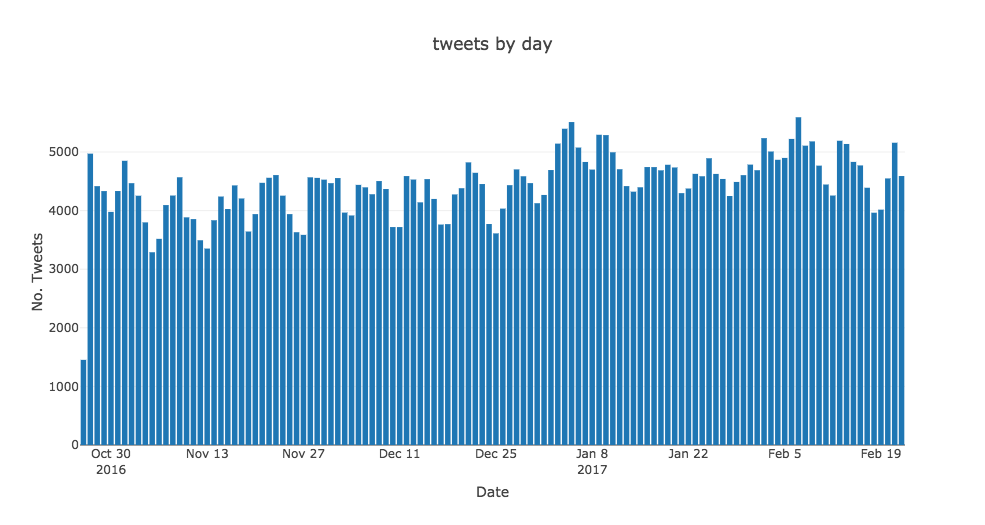

In [43]:
Image("tweets_by_day.png")

In [44]:
diff_df = pd.DataFrame(clean_df.groupby("date").count()['tweet'].diff())
diff_df_plot = line_graph(list(diff_df.index)[2:], list(diff_df['tweet'])[2:],'Difference in tweets by day', 'Date', 'Difference', 'difference-bar-plot')
diff_df_plot # a couple of spikes!

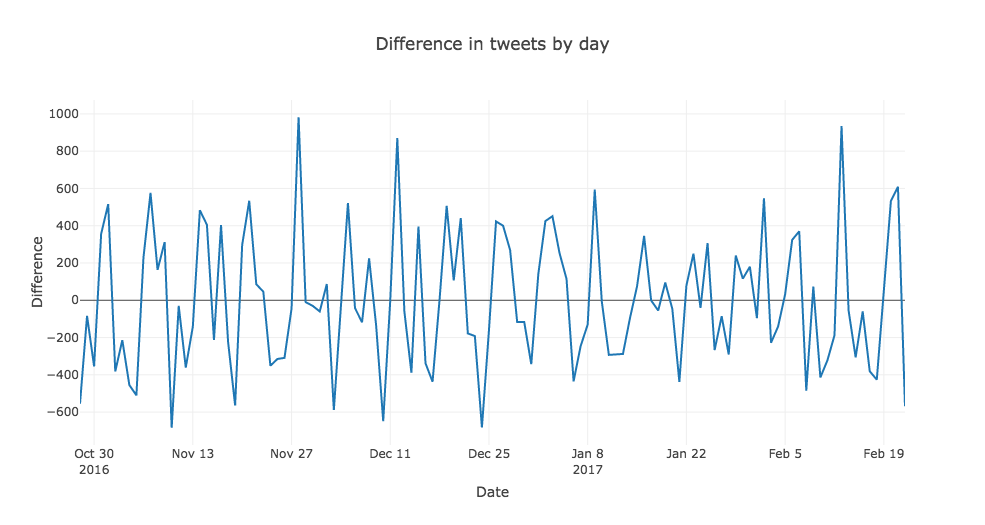

In [45]:
Image("difference_by_day.png")

In [46]:
#Let's find how many unique hashtags we have over a 4 month period
set_of_all_hashtags = set()
counts = {}
for i in range(clean_df.shape[0]):
    temp_lst = clean_df.iloc[i, 6].split()
    hashtags = [x for x in temp_lst if x.startswith("#")]
    for tag in hashtags:
        if tag not in counts:
            counts[tag] = 1
        else:
            counts[tag] += 1
        set_of_all_hashtags.add(tag)
print("There are {} unique hashtags over the course of 4 months".format(len(set_of_all_hashtags)))

There are 33110 unique hashtags over the course of 4 months


In [47]:
# let's visualize the top 50 hashtags
counts_lst = []
for k, v in counts.items():
    counts_lst.append((k, v))

top_50_hashtags = pd.DataFrame(sorted(counts_lst, key=lambda x: x[1], reverse=True)[:50])
top_50_hashtags.set_index(0, inplace=True)
top_50_hashtags.sort_values(by=1, inplace=True)
top_50_hashtags.index.names = ['hashtag']
top_50_hashtags = top_50_hashtags.rename(columns = {1:'count'})

top_50_hashtags_plot = horizontal_bar_graph(top_50_hashtags['count'], top_50_hashtags.index, 'Top 50 hashtags by count', 'Count', 'Hashtag','top-50-hashtags-barh')
top_50_hashtags_plot

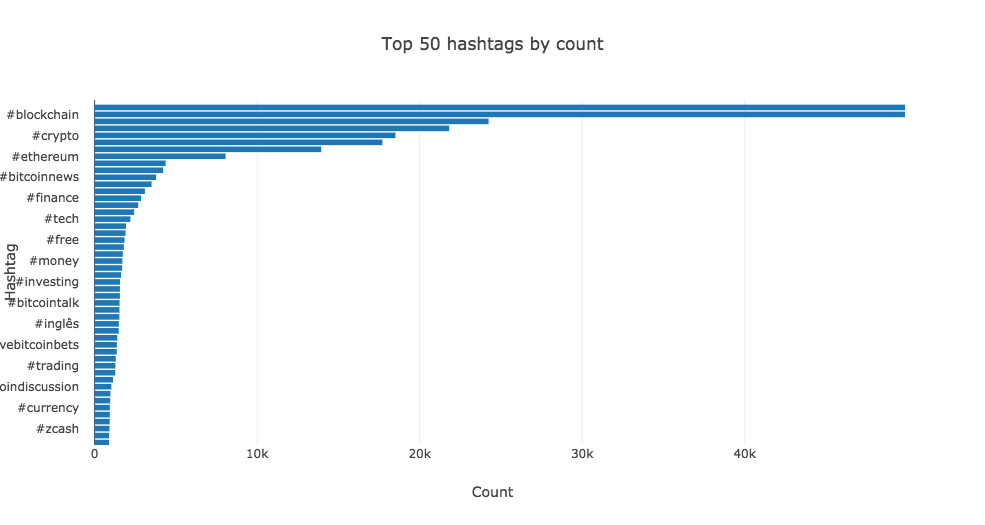

In [48]:
Image("top_50_hashtags.png")

Lets look at some stats at the day level:

In [49]:
stats = pd.DataFrame(clean_df.groupby("date")['tweet'].size().describe())
stats.drop(["count"], inplace=True)
stats = stats.rename(columns = {"tweet":'tweets_per_day'})
print(tabulate(stats, headers='keys', tablefmt='fancy_grid'))

╒══════╤══════════════════╕
│      │   tweets_per_day │
╞══════╪══════════════════╡
│ mean │         4425.37  │
├──────┼──────────────────┤
│ std  │          547.018 │
├──────┼──────────────────┤
│ min  │         1453     │
├──────┼──────────────────┤
│ 25%  │         4184.5   │
├──────┼──────────────────┤
│ 50%  │         4468.5   │
├──────┼──────────────────┤
│ 75%  │         4737.5   │
├──────┼──────────────────┤
│ max  │         5593     │
╘══════╧══════════════════╛


Now that we have plotted the hashtags. There is no need to keep the hashtags in the corpus of a particular tweet. In fact, keeping the hashtag would serve to only confuse our sentiment calculations.

In [50]:
clean_df['clean_tweet_V2'] = clean_df['clean_tweet_V2'].apply(lambda x: x.replace("#",""))

In [51]:
clean_df.head()

,date,handle,time,tweet,tuple_version_tweet,clean_tweet_V1,clean_tweet_V2
0,2016-10-26,ChiefApricot,17:51:46,Excellent primer on bitcoin mining,"(mining, primer, excellent, on, bitcoin)",excellent primer on bitcoin mining,excellent primer bitcoin mining
1,2016-10-26,bitcoin_experts,17:52:23,theymos: Do you know of a good tutorial for that?,"(tutorial, of, for, know, theymos, that, do, good, a, you)",theymos do you know of a good tutorial for that,theymos know good tutorial
2,2016-10-26,Bitcoin_City,17:52:25,#btc Darkstore opens on-demand delivery fulfillment centers in New York and Phoenix: Darkst... #bitcoin #crypto,"(in, york, #btc, #bitcoin, fulfillment, centers, darkst, delivery, new, phoenix, and, #crypto, ondemand, darkstore, opens)",#btc darkstore opens ondemand delivery fulfillment centers in new york and phoenix darkst #bitcoin #crypto,btc darkstore opens ondemand delivery fulfillment centers new york phoenix darkst bitcoin crypto
3,2016-10-26,Bitcoin_City,17:52:25,#btc Javelin Venture Partners just closed its fourth fund with $125 million: Javelin Ventur... #bitcoin #crypto,"(closed, just, 125, #btc, million, fourth, #bitcoin, partners, its, fund, venture, #crypto, with, ventur, javelin)",#btc javelin venture partners just closed its fourth fund with 125 million javelin ventur #bitcoin #crypto,btc javelin venture partners closed fourth fund million javelin ventur bitcoin crypto
4,2016-10-26,Bitcoin_City,17:52:25,"#btc Microsoft shows off a new $99 input method with the Surface Dial: Okay, this is cool. ... #bitcoin #crypto","(this, is, shows, microsoft, cool, #btc, method, #bitcoin, #crypto, dial, off, with, the, okay, input, 99, new, a, surface)",#btc microsoft shows off a new 99 input method with the surface dial okay this is cool #bitcoin #crypto,btc microsoft shows new input method surface dial okay cool bitcoin crypto


While it is excellent that we have such a high level of granularity for our time column, it is not needed for our analysis. Rather, it would be excellent if we could place tweets into "hourly" buckets. This way, we can have analysis for both the day level and the hour level!

In [52]:
hours = []

for index in clean_df.index:
    hours.append(clean_df.iloc[index, 2].hour)

In [53]:
clean_df.shape[0] == len(hours) #perfect

True

In [54]:
clean_df['hour_of_day'] = hours
clean_df = clean_df.set_value(clean_df[clean_df['hour_of_day'] == 0].index, "hour_of_day", 24)

In [55]:
clean_df.head()

,date,handle,time,tweet,tuple_version_tweet,clean_tweet_V1,clean_tweet_V2,hour_of_day
0,2016-10-26,ChiefApricot,17:51:46,Excellent primer on bitcoin mining,"(mining, primer, excellent, on, bitcoin)",excellent primer on bitcoin mining,excellent primer bitcoin mining,17
1,2016-10-26,bitcoin_experts,17:52:23,theymos: Do you know of a good tutorial for that?,"(tutorial, of, for, know, theymos, that, do, good, a, you)",theymos do you know of a good tutorial for that,theymos know good tutorial,17
2,2016-10-26,Bitcoin_City,17:52:25,#btc Darkstore opens on-demand delivery fulfillment centers in New York and Phoenix: Darkst... #bitcoin #crypto,"(in, york, #btc, #bitcoin, fulfillment, centers, darkst, delivery, new, phoenix, and, #crypto, ondemand, darkstore, opens)",#btc darkstore opens ondemand delivery fulfillment centers in new york and phoenix darkst #bitcoin #crypto,btc darkstore opens ondemand delivery fulfillment centers new york phoenix darkst bitcoin crypto,17
3,2016-10-26,Bitcoin_City,17:52:25,#btc Javelin Venture Partners just closed its fourth fund with $125 million: Javelin Ventur... #bitcoin #crypto,"(closed, just, 125, #btc, million, fourth, #bitcoin, partners, its, fund, venture, #crypto, with, ventur, javelin)",#btc javelin venture partners just closed its fourth fund with 125 million javelin ventur #bitcoin #crypto,btc javelin venture partners closed fourth fund million javelin ventur bitcoin crypto,17
4,2016-10-26,Bitcoin_City,17:52:25,"#btc Microsoft shows off a new $99 input method with the Surface Dial: Okay, this is cool. ... #bitcoin #crypto","(this, is, shows, microsoft, cool, #btc, method, #bitcoin, #crypto, dial, off, with, the, okay, input, 99, new, a, surface)",#btc microsoft shows off a new 99 input method with the surface dial okay this is cool #bitcoin #crypto,btc microsoft shows new input method surface dial okay cool bitcoin crypto,17


In [56]:
clean_df_tweet_by_hour_plot = line_graph(clean_df.groupby("hour_of_day").count()['tweet'].index, clean_df.groupby("hour_of_day").count()['tweet'], "tweets by hour", "Hour", "No. Tweets", "tweets-by-hour")
clean_df_tweet_by_hour_plot #plot looks pretty uniform!

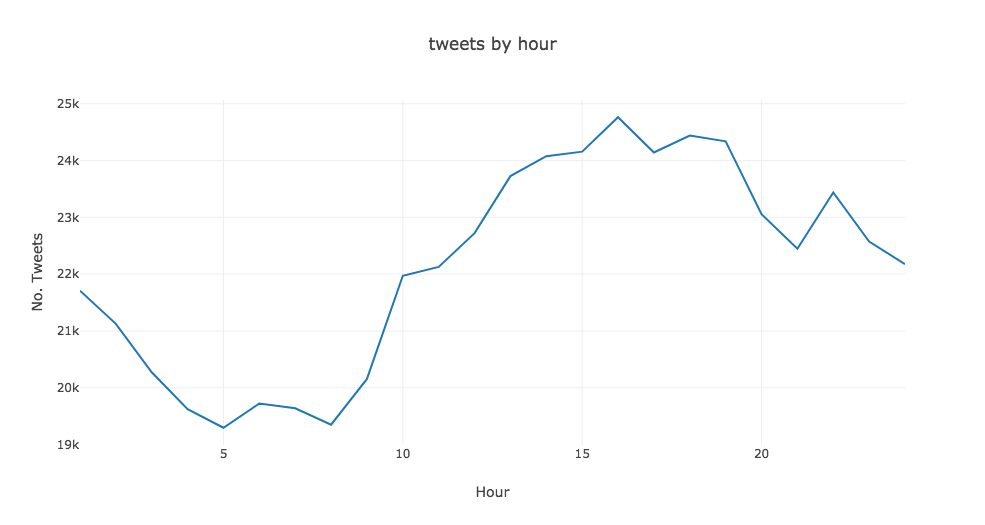

In [57]:
Image("tweets_by_hour.png")

In [58]:
number_of_tweets = []
number_of_users = []

for k, v in Counter(clean_df.groupby("handle").count()['tweet']).items():
    number_of_tweets.append(k)
    number_of_users.append(v)
scaled_num_users = list(map(lambda x: x/10e3, number_of_users))

tweets_per_user_plot = bar_graph(number_of_tweets, scaled_num_users, "Tweets per user", "Number of tweets per user", "Number of Users (10e3)", "tweet-per-user")
tweets_per_user_plot

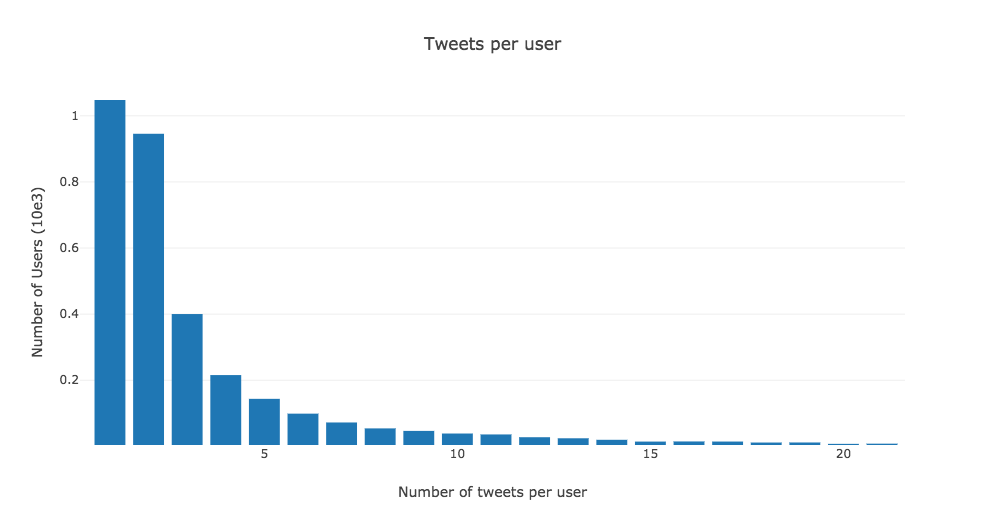

In [59]:
Image("tweets_by_user.png") #the first bar has a value of 5.0471 x 10^3

This concludes the exploration notebook! In the next notebook, we will gather some additional data and prepare our data for the modelling process!

As far as model building is concerned, we only need the dates, hours and clean_tweet_V2. Everything else is irrelevant. Let's go ahead and make these changes!

In [85]:
clean_df.drop(["handle", "time", "tweet", "tuple_version_tweet", "clean_tweet_V1"], axis=1, inplace=True)

In [86]:
clean_df.head()

,date,clean_tweet_V2,hour_of_day
0,2016-10-26,excellent primer bitcoin mining,17
1,2016-10-26,theymos know good tutorial,17
2,2016-10-26,btc darkstore opens ondemand delivery fulfillment centers new york phoenix darkst bitcoin crypto,17
3,2016-10-26,btc javelin venture partners closed fourth fund million javelin ventur bitcoin crypto,17
4,2016-10-26,btc microsoft shows new input method surface dial okay cool bitcoin crypto,17


In [87]:
pickle_object(clean_df, "clean_df_NB3_Complete")

### Conclusion

In this notebook, we have attempted to control for bots as well as dupliate tweets. I am sure that there are tweets that slopped throughmy filtrations and cleaning code. However, this should be very small and not have a major impact on my results. At least, that is the hope!